In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns
import pandas as pd

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
#loading the data

iris_dataset=datasets.load_iris()


In [10]:
#feature matrix
X=iris_dataset.data


In [11]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
#Target variable

y=iris_dataset.target

In [13]:
y[:5]

array([0, 0, 0, 0, 0])

In [14]:
#target names
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
#Iris dataframe

iris_df=pd.DataFrame(iris_dataset.data,columns=iris_dataset.feature_names)

In [16]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
#Adding target data 
iris_df['Species']=iris_dataset['target']

iris_df['Species']=iris_df['Species'].apply(lambda x: iris_dataset['target_names'][x])

In [20]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris_df.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

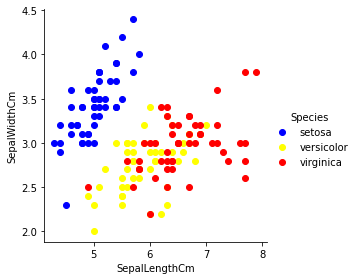

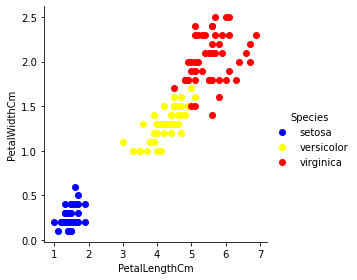

In [25]:
#Feature wise class separation
colors = {'Setosa':'blue','Versicolor':'yellow','Virginica':'red'}


sns.FacetGrid(iris_df, hue="Species", height=4, palette=colors.values()) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()


sns.FacetGrid(iris_df, hue= "Species", height=4, palette=colors.values()).\
map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()


plt.show()

In [26]:
#PCA can be used when correlation between features is high

In [28]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:>

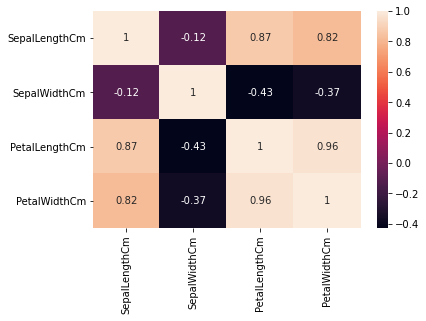

In [29]:
sns.heatmap(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(),annot=True)

In [30]:
#There is a strong relationship between:
# 1.sepal length and petal width
# 2.Sepal length and petal length
# 3.Petal length and petal width


In [33]:
#PCA

#First step: Normalize

#Use standard scaler to normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

explained variance ratio (first three components): [0.72962445 0.22850762 0.03668922]


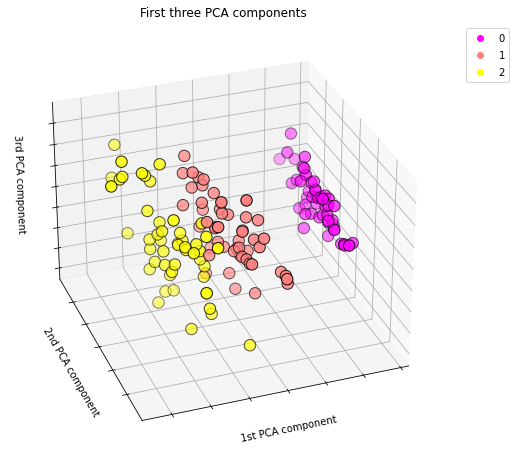

In [34]:
#Running the PCA for the data and visualizing it (standardized data)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

pca3 = PCA(n_components=3)
X_reduced = pca3.fit_transform(X)


sc=ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.spring, edgecolor='k', s=130)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_title("First three PCA components")
ax.set_xlabel("1st PCA component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd PCA component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd PCA component")
ax.w_zaxis.set_ticklabels([])

# Percentage of variance explained for each component
print('explained variance ratio (first three components): {}' # First three PCA components capture 0.99478781 of total variation!
      .format(pca3.explained_variance_ratio_))

plt.show()

In [43]:
print("please note:")
for i in range(len(iris_dataset['target_names'])):
    print(iris_dataset['target_names'][i],"=",i)

please note:
setosa = 0
versicolor = 1
virginica = 2
